In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

In [2]:
df=pd.read_csv('diabetes.csv') #load data into a dataframe container 
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

<h1> Exploratory Data Analytics </h1>

In [3]:
df.describe(include='all') #gives decriptive stats

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [4]:
df.shape #how many rows*columnms

(2000, 9)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [6]:
df.isnull().values.any() #not necessary here as we knew there are no missing values from step 1

False

In [7]:
'''Differences between df.isnull().any() or df.count() in notes'''
df.isnull().sum() #check if your above result was correct


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
categorical = ['Age', 'Pregnancies']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DEC2A780>,
      dtype=object)

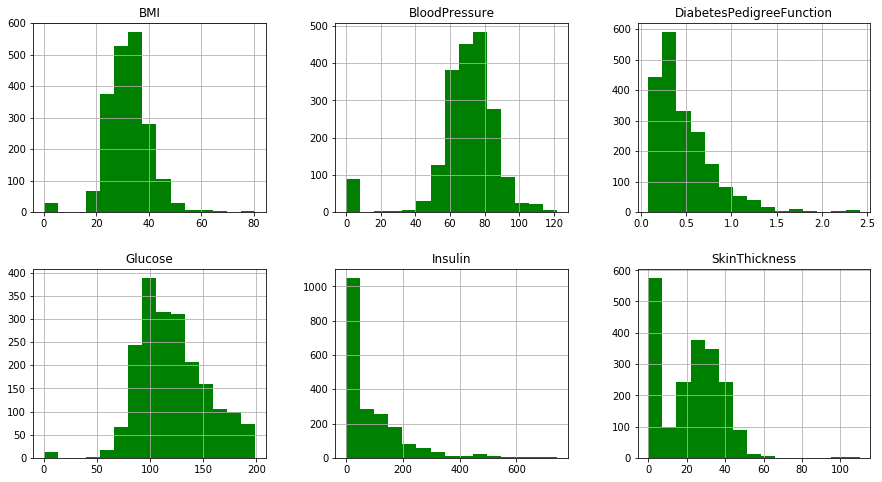

In [9]:
numerical = ['Glucose', 'Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'SkinThickness']
df[numerical].hist(bins=15, figsize=(15, 8), layout=(2, 3), color='g')

In [10]:
data = df[numerical + categorical]
target=df['Outcome']
data = pd.concat([data,target], axis = 1)
data.shape

(2000, 9)

In [11]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]


In [12]:
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [13]:
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [14]:
target_count()

In [15]:
target_percent()

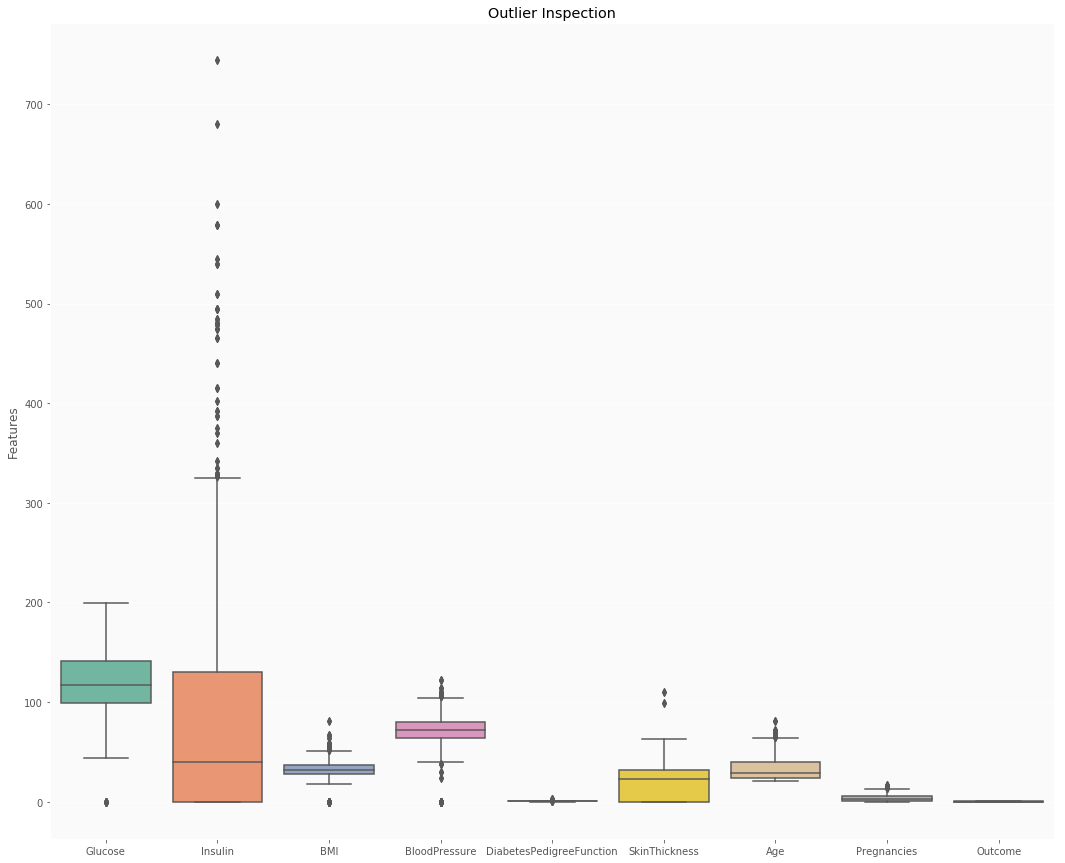

In [16]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(18, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Features')
plt.title("Outlier Inspection")
ax = sns.boxplot(data = data, 
  orient = 'v', 
  palette = 'Set2')

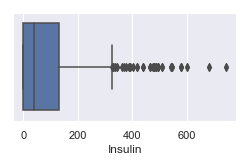

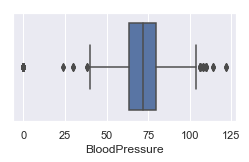

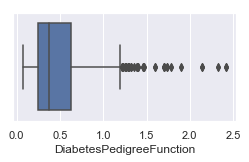

In [17]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=data['Insulin'])
plt.show()
sns.boxplot(x=data['BloodPressure'])
plt.show()
sns.boxplot(x=data['DiabetesPedigreeFunction'])
plt.show()

In [18]:
#outlier remove

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 Glucose                     99.000
Insulin                      0.000
BMI                         27.375
BloodPressure               63.500
DiabetesPedigreeFunction     0.244
SkinThickness                0.000
Age                         24.000
Pregnancies                  1.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Glucose                     141.000
Insulin                     130.000
BMI                          36.800
BloodPressure                80.000
DiabetesPedigreeFunction      0.624
SkinThickness                32.000
Age                          40.000
Pregnancies                   6.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Glucose                      42.000
Insulin                     130.000
BMI                           9.425
BloodPressure                16.500
DiabetesPedigreeFunction      0.380
SkinThickness                32.000
Age                          16.000
Pregnancies         

In [19]:
df_out = data[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,df_out.shape 

((2000, 9), (1652, 9))

In [20]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(18, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Features')
plt.title("Removed Outliers")
ax = sns.boxplot(data = df_out, 
  orient = 'v', 
  palette = 'Set2')

In [21]:
#correlation matrix
corrmat = df_out.corr()
f, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(corrmat, vmax=1, square=True,annot=True)

# Takeaways---> skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

In [22]:
df_out['Pregnancies'].unique()

array([ 2,  0,  4,  5,  7,  6,  3, 10,  1,  8, 12,  9, 11, 13],
      dtype=int64)

In [23]:
def group_no_of_pregancies(no):
    if no >= 0 and no<=2:
        return "0-2"
    if no >= 3 and no<=5:
        return "3-5"
    if no >=6  and no<=8:
        return "6-8"
    if no >=9  and no<=11:
        return "9-11"
    if no >=12  and no<=14:
        return "12-14"
    if no >=15  and no<=17:
        return "15-17"
df_out['pregnancies_groups'] = df_out['Pregnancies'].apply(group_no_of_pregancies)  


In [24]:
df_out.head()
dfg1=df_out.groupby(['pregnancies_groups']).Outcome.value_counts()

In [25]:
dfg1

pregnancies_groups  Outcome
0-2                 0          617
                    1          158
12-14               0           21
                    1           18
3-5                 0          299
                    1          151
6-8                 0          141
                    1          124
9-11                1           65
                    0           58
Name: Outcome, dtype: int64

In [26]:
dfp = dfg1.unstack()

In [27]:
dfp

Outcome               0    1
pregnancies_groups          
0-2                 617  158
12-14                21   18
3-5                 299  151
6-8                 141  124
9-11                 58   65

In [28]:
dfp.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show() 

In [29]:
dfg1 = pd.DataFrame(dfg1)
dfg1.rename(columns={'Outcome': 'count'}, inplace=True)
dfg1.reset_index(inplace=True)

In [30]:
dfg1

pregnancies_groups  Outcome  count
0                0-2        0    617
1                0-2        1    158
2              12-14        0     21
3              12-14        1     18
4                3-5        0    299
5                3-5        1    151
6                6-8        0    141
7                6-8        1    124
8               9-11        1     65
9               9-11        0     58

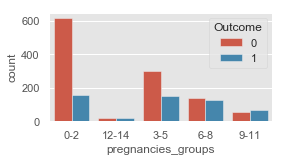

In [31]:
sns.barplot(x='pregnancies_groups', y= 'count', data=dfg1, hue='Outcome')
plt.show()

In [32]:
df_out['Age'].unique()

array([47, 23, 24, 58, 28, 42, 33, 45, 30, 25, 55, 39, 21, 41, 40, 38, 35,
       64, 46, 22, 27, 26, 37, 48, 29, 31, 36, 32, 54, 34, 60, 61, 62, 43,
       57, 52, 51, 44, 63, 59, 49, 50, 53, 56], dtype=int64)

In [33]:
def age_groups(age):
    if age>= 20 and age<=30:
        return "20-30"
    if age>= 31 and age<=41:
        return "31-41"
    if age>= 42 and age<=52:
        return "42-52"
    if age>= 53 and age<=63:
        return "53-63"
    if age>= 64 and age<=74:
        return "64-74"
    if age>= 75 and age<=85:
        return "75-85"
    
df_out['age_groups'] = df_out['Age'].apply(age_groups) 
df_out.head()

Glucose  Insulin   BMI  BloodPressure  DiabetesPedigreeFunction  \
0      138        0  33.6             62                     0.127   
1       84      125  38.2             82                     0.233   
3      135      250  42.3             68                     0.365   
5      173      265  46.5             78                     1.159   
6       99        0  25.6             72                     0.294   

   SkinThickness  Age  Pregnancies  Outcome pregnancies_groups age_groups  
0             35   47            2        1                0-2      42-52  
1             31   23            0        0                0-2      20-30  
3             42   24            0        1                0-2      20-30  
5             32   58            0        0                0-2      53-63  
6             17   28            4        0                3-5      20-30

In [34]:
dfg2=df_out.groupby(['age_groups']).Outcome.value_counts()

In [35]:
dfg2

age_groups  Outcome
20-30       0          772
            1          162
31-41       0          207
            1          180
42-52       1          132
            0           93
53-63       0           61
            1           42
64-74       0            3
Name: Outcome, dtype: int64

In [36]:
dfp2 = dfg2.unstack()

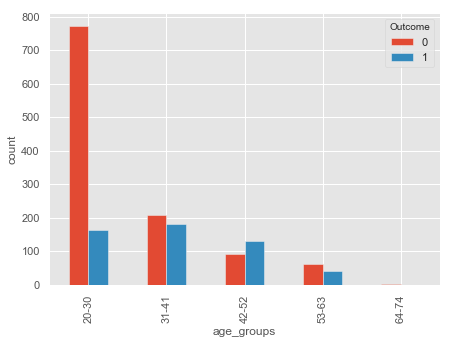

In [37]:
dfp2.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

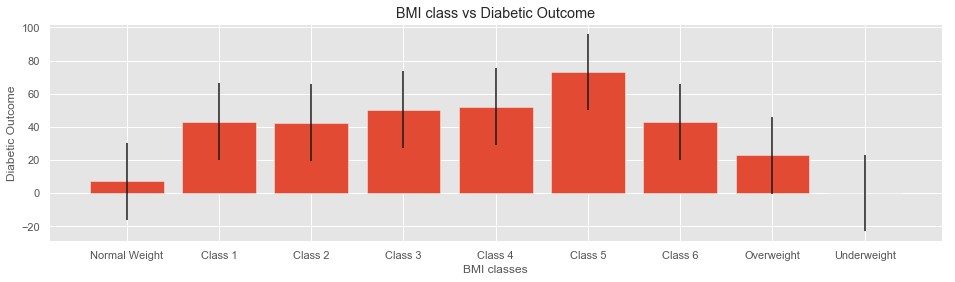

In [38]:
def get_bmi_groups(bmi):
    if bmi >= 16 and bmi <18.5:
        return "Underweight"
    elif bmi >= 18.5 and bmi < 25 :
        return "Normal weight"
    elif bmi >= 25 and bmi < 30:
        return "Overweight"
    elif bmi >= 30 and bmi < 35:
        return "Obese Class I (Moderately obese)"
    elif bmi >= 35 and bmi < 40:
        return "Obese Class II (Severely obese)"
    elif bmi >= 40 and bmi < 45:
        return "Obese Class III (Very severely obese)"
    elif bmi >= 45 and bmi < 50:
        return "Obese Class IV (Morbidly Obese)"
    elif bmi >= 50 and bmi < 60:
        return "Obese Class V (Super Obese)"
    elif bmi >= 60:
        return "Obese Class VI (Hyper Obese)"

df['bmi_groups'] = df['BMI'].apply(get_bmi_groups)

bmi_groups_groupby = df.groupby(['bmi_groups'])
bmi_groups_groupby_count = bmi_groups_groupby.count()['Outcome']
bmi_groups_groupby_sum = bmi_groups_groupby.sum()['Outcome']
bmi_groups_groupby_percentage = bmi_groups_groupby_sum / bmi_groups_groupby_count * 100

plt.figure(figsize=(16,4))
plt.bar(x=range(0,9), height=bmi_groups_groupby_percentage, yerr=bmi_groups_groupby_percentage.std(),
        tick_label=["Normal Weight", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", 
                    "Overweight", "Underweight"])
plt.title("BMI class vs Diabetic Outcome")
plt.xlabel("BMI classes")
plt.ylabel("Diabetic Outcome")
plt.show()



C:\Users\Ketaki Barde\AnacondaLatest\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



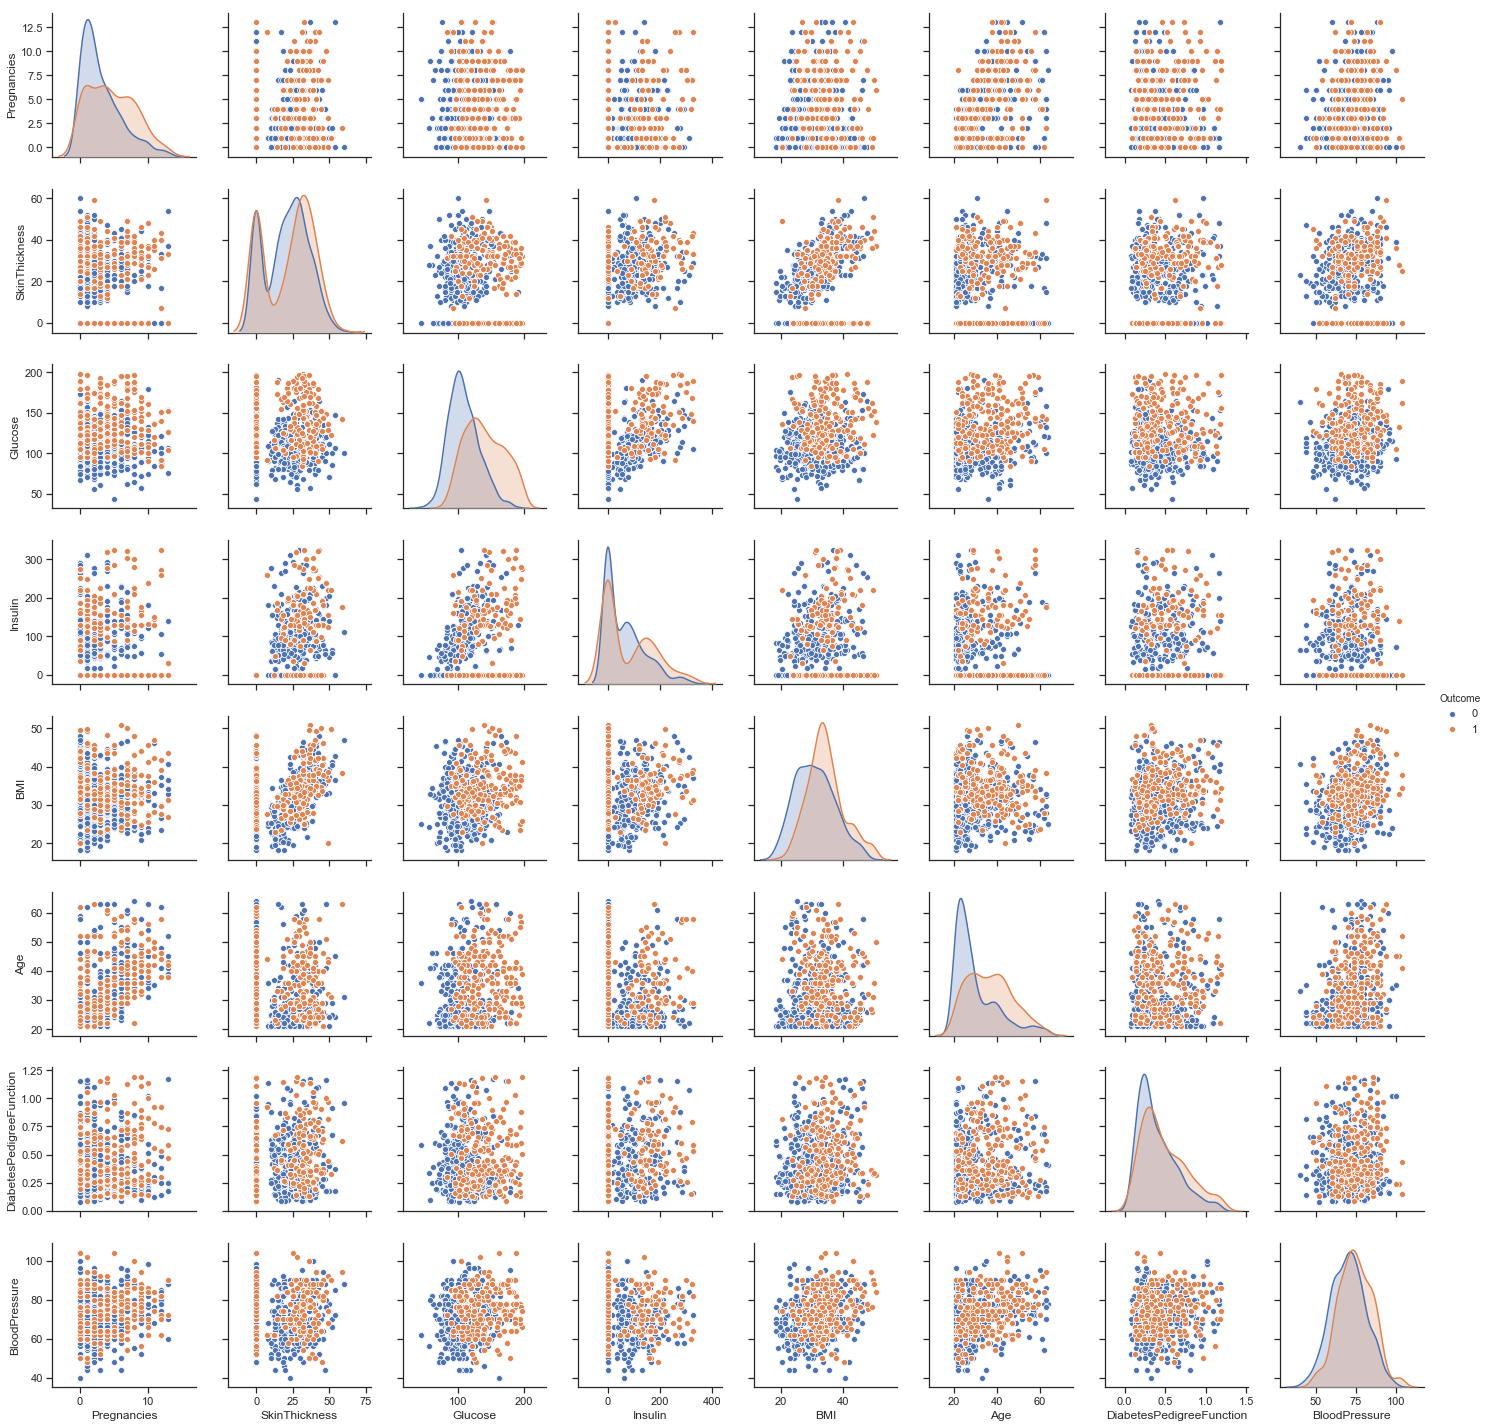

In [39]:
sns.set(style="ticks",color_codes=True)
sns.pairplot(df_out, hue="Outcome", diag_kind = 'auto', kind="scatter",  x_vars=["Pregnancies","SkinThickness", "Glucose", "Insulin", "BMI", "Age","DiabetesPedigreeFunction", "BloodPressure" ], y_vars=["Pregnancies", "SkinThickness", "Glucose", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction", "BloodPressure" ])


In [40]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [41]:
def median_target(var):   
    temp = df_out[df_out[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [42]:
plot_distribution('Glucose', 0)

In [43]:
median_target('Glucose')

Outcome  Glucose
0        0      106
1        1      138

In [44]:
plot_distribution('BMI', 0)

In [45]:
median_target('BMI')

Outcome   BMI
0        0  30.5
1        1  33.8

In [46]:
plot_distribution('BloodPressure', 5)

In [47]:
median_target('BloodPressure')

Outcome  BloodPressure
0        0             70
1        1             74

In [48]:
plot_distribution('DiabetesPedigreeFunction', 0)
median_target('DiabetesPedigreeFunction')

Outcome  DiabetesPedigreeFunction
0        0                     0.336
1        1                     0.422

In [49]:
plot_distribution('Insulin', 0)
median_target('Insulin')

Outcome  Insulin
0        0       49
1        1        0

In [50]:
plot_distribution('SkinThickness', 0)
median_target('SkinThickness')

Outcome  SkinThickness
0        0             23
1        1             27

In [51]:
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)

In [52]:
median_target('Age')

Outcome  Age
0        0   26
1        1   36

In [53]:
median_target('Pregnancies')

Outcome  Pregnancies
0        0            2
1        1            4

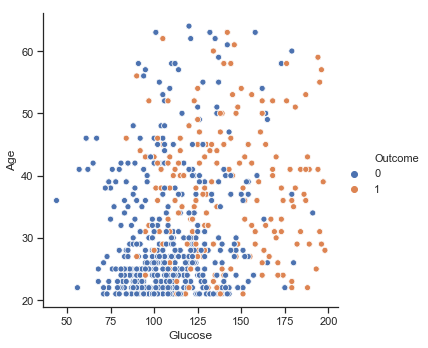

In [54]:
sns.relplot(x="Glucose", y="Age", hue="Outcome", data=df_out); #Healthy persons are concentrate with an age <= 30 and glucose <= 120

In [55]:
df_out.loc[:,'N1']=0
df_out.loc[(df_out['Age']<=30) & (df_out['Glucose']<=120),'N1']=1

In [56]:
df_out.head(50)

Glucose  Insulin   BMI  BloodPressure  DiabetesPedigreeFunction  \
0       138        0  33.6             62                     0.127   
1        84      125  38.2             82                     0.233   
3       135      250  42.3             68                     0.365   
5       173      265  46.5             78                     1.159   
6        99        0  25.6             72                     0.294   
8        83       66  36.8             65                     0.629   
9        89        0  33.5             90                     0.292   
10       99        0  32.8             68                     0.145   
11      125      122  28.9             70                     1.144   
14      110        0  26.0             68                     0.292   
15       81       76  30.1             72                     0.547   
16      195      145  25.1             70                     0.163   
17      154      193  29.3             74                     0.839   
18      117       71  25.2             90                     0.313   
19       84        0  37.2             72                     0.267   
21       94       79  33.3             64                     0.738   
22       96        0  37.3             78                     0.238   
23       75        0  33.3             82                     0.263   
24      180       90  36.5             90                     0.314   
25      130      170  28.6             60                     0.692   
26       84       76  30.4             50                     0.968   
27      120        0  25.0             78                     0.409   
28       84        0  29.7             72                     0.297   
29      139      210  22.1             62                     0.207   
30       91        0  24.2             68                     0.200   
31       91        0  27.3             62                     0.525   
32       99       86  25.6             54                     0.154   
33      163      105  31.6             70                     0.268   
34      122        0  27.6             78                     0.512   
35      103      192  24.0             60                     0.966   
36      138        0  33.2             76                     0.420   
37      102        0  32.9             76                     0.665   
38       90        0  38.2             68                     0.503   
40      180       70  34.0             64                     0.271   
41      133        0  40.2             84                     0.696   
42      106        0  22.7             92                     0.235   
44      159        0  27.4             64                     0.294   
46      146        0  29.7             56                     0.564   
47       71        0  28.0             70                     0.586   
48      103        0  39.1             66                     0.344   
50      103       82  19.4             80                     0.491   
51      101       36  24.2             50                     0.526   
52       88       23  24.4             66                     0.342   
53      176      300  33.7             90                     0.467   
55       73        0  23.0             50                     0.248   
56      187      304  37.7             68                     0.254   
57      100      110  46.8             88                     0.962   
59      105      142  41.5             64                     0.173   
61      133        0  32.9             72                     0.270   
62       44        0  25.0             62                     0.587   

    SkinThickness  Age  Pregnancies  Outcome pregnancies_groups age_groups  N1  
0              35   47            2        1                0-2      42-52   0  
1              31   23            0        0                0-2      20-30   1  
3              42   24            0        1                0-2      20-30   0  
5              32   58            0        0              

In [57]:
df_out.loc[:,'N2']=0
df_out.loc[(df_out['BMI']<=30),'N2']=1

In [58]:
def plot_pie(var_select, sub) :
    D = df_out[(df_out['Outcome'] != 0)]
    H = df_out[(df_out['Outcome'] == 0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [59]:
plot_pie('N2', 'BMI <= 30')

In [60]:
df['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

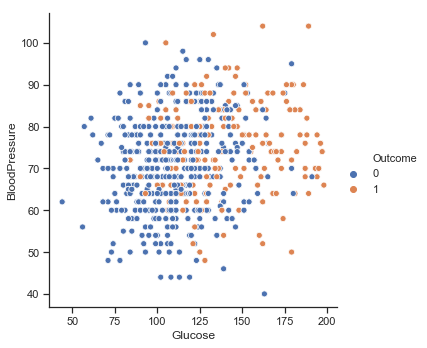

In [61]:
sns.relplot(x="Glucose", y="BloodPressure", hue="Outcome", data=df_out) #Healthy persons are concentrate with an blood pressure <= 80 and glucose <= 105

In [62]:
df_out.loc[:,'N3']=0
df_out.loc[(df_out['BloodPressure']<=80) & (df_out['Glucose']<=105),'N3']=1

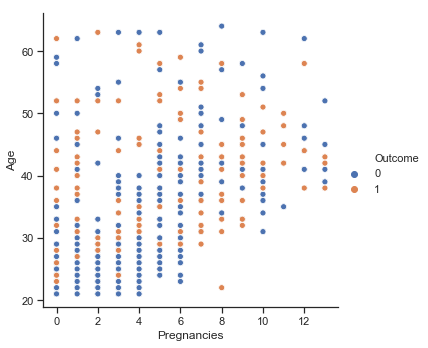

In [63]:
sns.relplot(x="Pregnancies", y="Age", hue="Outcome", data=df_out) # Age <= 30 and Pregnancies <= 6 Health

In [64]:
df_out.loc[:,'N4']=0
df_out.loc[(df_out['Age']<=30) & (df_out['Pregnancies']<=6),'N4']=1

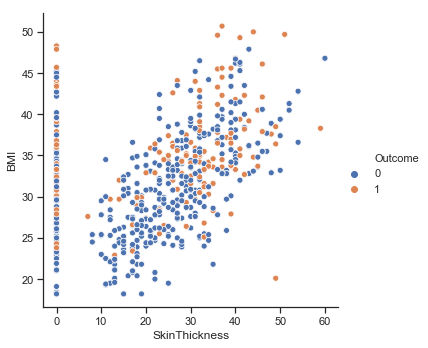

In [65]:
sns.relplot(x="SkinThickness", y="BMI", hue="Outcome", data=df_out)  #Healthy persons are concentrate with a BMI < 30 and skin thickness <= 20

In [66]:
df_out.loc[:,'N5']=0
df_out.loc[(df_out['SkinThickness']<=20) & (df_out['BMI']<=30),'N5']=1

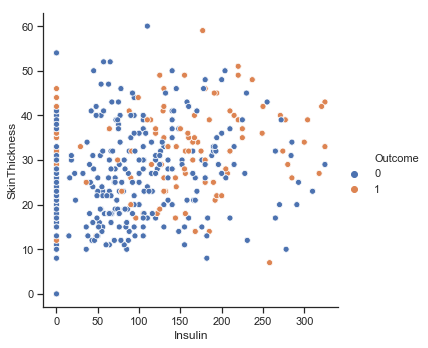

In [67]:
sns.relplot(x="Insulin", y="SkinThickness", hue="Outcome", data=df_out) 

In [68]:
df_out.loc[:,'N6']=0
df_out.loc[(df_out['SkinThickness']<=23) & (df_out['Insulin']<=102),'N6']=1

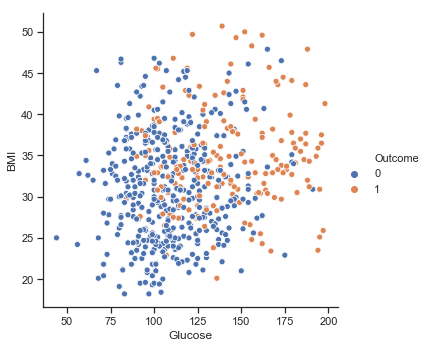

In [69]:
sns.relplot(x="Glucose", y="BMI", hue="Outcome", data=df_out) 

In [70]:
df_out.loc[:,'N7']=0
df_out.loc[(df_out['BMI']<=30) & (df_out['Glucose']<=105),'N7']=1

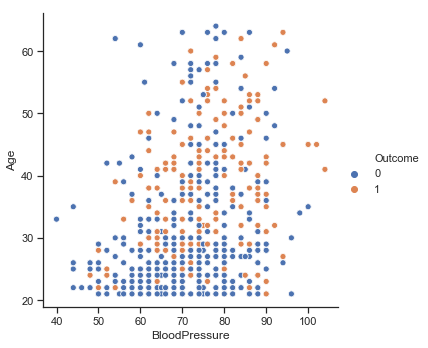

In [71]:
sns.relplot(x="BloodPressure", y="Age", hue="Outcome", data=df_out) 

In [72]:
df_out.loc[:,'N8']=0
df_out.loc[(df_out['Age']<=26) & (df_out['BloodPressure']<=80),'N8']=1

In [73]:
df_out['N0'] = df_out['BMI'] * df_out['SkinThickness']

In [74]:
df_out

Glucose  Insulin   BMI  BloodPressure  DiabetesPedigreeFunction  \
0         138        0  33.6             62                     0.127   
1          84      125  38.2             82                     0.233   
3         135      250  42.3             68                     0.365   
5         173      265  46.5             78                     1.159   
6          99        0  25.6             72                     0.294   
8          83       66  36.8             65                     0.629   
9          89        0  33.5             90                     0.292   
10         99        0  32.8             68                     0.145   
11        125      122  28.9             70                     1.144   
14        110        0  26.0             68                     0.292   
15         81       76  30.1             72                     0.547   
16        195      145  25.1             70                     0.163   
17        154      193  29.3             74                     0.839   
18        117       71  25.2             90                     0.313   
19         84        0  37.2             72                     0.267   
21         94       79  33.3             64                     0.738   
22         96        0  37.3             78                     0.238   
23         75        0  33.3             82                     0.263   
24        180       90  36.5             90                     0.314   
25        130      170  28.6             60                     0.692   
26         84       76  30.4             50                     0.968   
27        120        0  25.0             78                     0.409   
28         84        0  29.7             72                     0.297   
29        139      210  22.1             62                     0.207   
30         91        0  24.2             68                     0.200   
31         91        0  27.3             62                     0.525   
32         99       86  25.6             54                     0.154   
33        163      105  31.6             70                     0.268   
34        122        0  27.6             78                     0.512   
35        103      192  24.0             60                     0.966   
...       ...      ...   ...            ...                       ...   
1963      108       63  32.5             52                     0.318   
1964      108        0  32.4             66                     0.272   
1965      154      284  32.8             62                     0.237   
1967       57        0  32.8             80                     0.096   
1970       90        0  27.3             70                     0.085   
1971      136      204  37.4             74                     0.399   
1972      114        0  21.9             65                     0.432   
1973      156      155  34.3             86                     1.189   
1975      188        0  47.9             78                     0.137   
1976      152        0  50.0             88                     0.337   
1977       99       94  24.6             52                     0.637   
1978      109      135  25.2             56                     0.833   
1979       88       53  29.0             74                     0.229   
1981      151        0  29.7             90                     0.294   
1982      102      105  37.2             74                     0.204   
1983      114      285  44.2             80                     0.167   
1984      100        0  29.7             64                     0.368   
1985      131        0  31.6             88                     0.743   
1986      104      156  29.9             74                     0.722   
1987      148        0  32.5             66                     0.256   
1988      120        0  29.6             68                     0.709   
1989      110        0  31.9             66                     0.471   
1990      111       78  28.4             90                     

In [75]:
df_out['N9'] =  df_out['Pregnancies'] / df_out['Age']

In [76]:
D = df_out[(df_out['Outcome'] != 0)]
H = df_out[(df_out['Outcome'] == 0)]

In [77]:
plot_distribution('N0', 0) #how to plot N8?

In [78]:
plot_distribution('N9', 0) #how to plot N9?

In [79]:
df_out.head()

Glucose  Insulin   BMI  BloodPressure  DiabetesPedigreeFunction  \
0      138        0  33.6             62                     0.127   
1       84      125  38.2             82                     0.233   
3      135      250  42.3             68                     0.365   
5      173      265  46.5             78                     1.159   
6       99        0  25.6             72                     0.294   

   SkinThickness  Age  Pregnancies  Outcome pregnancies_groups  ... N1  N2  \
0             35   47            2        1                0-2  ...  0   0   
1             31   23            0        0                0-2  ...  1   0   
3             42   24            0        1                0-2  ...  0   0   
5             32   58            0        0                0-2  ...  0   0   
6             17   28            4        0                3-5  ...  1   1   

   N3  N4  N5  N6  N7  N8      N0        N9  
0   0   0   0   0   0   0  1176.0  0.042553  
1   0   1   0   0   0   0  1184.2  0.000000  
3   0   1   0   0   0   1  1776.6  0.000000  
5   0   0   0   0   0   0  1488.0  0.000000  
6   1   1   1   1   1   0   435.2  0.142857  

[5 rows x 21 columns]

In [80]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 0 to 1999
Data columns (total 21 columns):
Glucose                     1652 non-null int64
Insulin                     1652 non-null int64
BMI                         1652 non-null float64
BloodPressure               1652 non-null int64
DiabetesPedigreeFunction    1652 non-null float64
SkinThickness               1652 non-null int64
Age                         1652 non-null int64
Pregnancies                 1652 non-null int64
Outcome                     1652 non-null int64
pregnancies_groups          1652 non-null object
age_groups                  1652 non-null object
N1                          1652 non-null int64
N2                          1652 non-null int64
N3                          1652 non-null int64
N4                          1652 non-null int64
N5                          1652 non-null int64
N6                          1652 non-null int64
N7                          1652 non-null int64
N8                     

In [81]:
df_out=df_out.drop(columns=['pregnancies_groups', 'age_groups'])
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 0 to 1999
Data columns (total 19 columns):
Glucose                     1652 non-null int64
Insulin                     1652 non-null int64
BMI                         1652 non-null float64
BloodPressure               1652 non-null int64
DiabetesPedigreeFunction    1652 non-null float64
SkinThickness               1652 non-null int64
Age                         1652 non-null int64
Pregnancies                 1652 non-null int64
Outcome                     1652 non-null int64
N1                          1652 non-null int64
N2                          1652 non-null int64
N3                          1652 non-null int64
N4                          1652 non-null int64
N5                          1652 non-null int64
N6                          1652 non-null int64
N7                          1652 non-null int64
N8                          1652 non-null int64
N0                          1652 non-null float64
N9                     

In [82]:
df_out.head()

Glucose  Insulin   BMI  BloodPressure  DiabetesPedigreeFunction  \
0      138        0  33.6             62                     0.127   
1       84      125  38.2             82                     0.233   
3      135      250  42.3             68                     0.365   
5      173      265  46.5             78                     1.159   
6       99        0  25.6             72                     0.294   

   SkinThickness  Age  Pregnancies  Outcome  N1  N2  N3  N4  N5  N6  N7  N8  \
0             35   47            2        1   0   0   0   0   0   0   0   0   
1             31   23            0        0   1   0   0   1   0   0   0   0   
3             42   24            0        1   0   0   0   1   0   0   0   1   
5             32   58            0        0   0   0   0   0   0   0   0   0   
6             17   28            4        0   1   1   1   1   1   1   1   0   

       N0        N9  
0  1176.0  0.042553  
1  1184.2  0.000000  
3  1776.6  0.000000  
5  1488.0  0.000000  
6   435.2  0.142857

In [83]:
target_col = ["Outcome"]
cat_cols   = df_out.nunique()[df_out.nunique() < 20].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in df_out.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = df_out.nunique()[df_out.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]



In [84]:
cat_cols

['Pregnancies', 'Outcome', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8']

In [85]:
bin_cols

['Outcome', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8']

In [86]:
multi_cols

['Pregnancies']

In [87]:
num_cols

['Glucose',
 'Insulin',
 'BMI',
 'BloodPressure',
 'DiabetesPedigreeFunction',
 'SkinThickness',
 'Age',
 'N0',
 'N9']

In [88]:
df_out.head()

Glucose  Insulin   BMI  BloodPressure  DiabetesPedigreeFunction  \
0      138        0  33.6             62                     0.127   
1       84      125  38.2             82                     0.233   
3      135      250  42.3             68                     0.365   
5      173      265  46.5             78                     1.159   
6       99        0  25.6             72                     0.294   

   SkinThickness  Age  Pregnancies  Outcome  N1  N2  N3  N4  N5  N6  N7  N8  \
0             35   47            2        1   0   0   0   0   0   0   0   0   
1             31   23            0        0   1   0   0   1   0   0   0   0   
3             42   24            0        1   0   0   0   1   0   0   0   1   
5             32   58            0        0   0   0   0   0   0   0   0   0   
6             17   28            4        0   1   1   1   1   1   1   1   0   

       N0        N9  
0  1176.0  0.042553  
1  1184.2  0.000000  
3  1776.6  0.000000  
5  1488.0  0.000000  
6   435.2  0.142857

In [89]:
std = StandardScaler()
scaled = std.fit_transform(df_out[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

C:\Users\Ketaki Barde\AnacondaLatest\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\Ketaki Barde\AnacondaLatest\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [90]:
scaled.isnull().sum()

Glucose                     0
Insulin                     0
BMI                         0
BloodPressure               0
DiabetesPedigreeFunction    0
SkinThickness               0
Age                         0
N0                          0
N9                          0
dtype: int64

In [91]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 9 columns):
Glucose                     1652 non-null float64
Insulin                     1652 non-null float64
BMI                         1652 non-null float64
BloodPressure               1652 non-null float64
DiabetesPedigreeFunction    1652 non-null float64
SkinThickness               1652 non-null float64
Age                         1652 non-null float64
N0                          1652 non-null float64
N9                          1652 non-null float64
dtypes: float64(9)
memory usage: 116.2 KB


In [92]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df_out[i] = le.fit_transform(df_out[i])

In [93]:
type(df_out)

pandas.core.frame.DataFrame

In [94]:
df_out.head()

Glucose  Insulin   BMI  BloodPressure  DiabetesPedigreeFunction  \
0      138        0  33.6             62                     0.127   
1       84      125  38.2             82                     0.233   
3      135      250  42.3             68                     0.365   
5      173      265  46.5             78                     1.159   
6       99        0  25.6             72                     0.294   

   SkinThickness  Age  Pregnancies  Outcome  N1  N2  N3  N4  N5  N6  N7  N8  \
0             35   47            2        1   0   0   0   0   0   0   0   0   
1             31   23            0        0   1   0   0   1   0   0   0   0   
3             42   24            0        1   0   0   0   1   0   0   0   1   
5             32   58            0        0   0   0   0   0   0   0   0   0   
6             17   28            4        0   1   1   1   1   1   1   1   0   

       N0        N9  
0  1176.0  0.042553  
1  1184.2  0.000000  
3  1776.6  0.000000  
5  1488.0  0.000000  
6   435.2  0.142857

In [95]:
#Duplicating columns for multi value columns
df_out = pd.get_dummies(data = df_out,columns = multi_cols )


In [96]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 0 to 1999
Data columns (total 32 columns):
Glucose                     1652 non-null int64
Insulin                     1652 non-null int64
BMI                         1652 non-null float64
BloodPressure               1652 non-null int64
DiabetesPedigreeFunction    1652 non-null float64
SkinThickness               1652 non-null int64
Age                         1652 non-null int64
Outcome                     1652 non-null int64
N1                          1652 non-null int64
N2                          1652 non-null int64
N3                          1652 non-null int64
N4                          1652 non-null int64
N5                          1652 non-null int64
N6                          1652 non-null int64
N7                          1652 non-null int64
N8                          1652 non-null int64
N0                          1652 non-null float64
N9                          1652 non-null float64
Pregnancies_0        

In [97]:
df_data_og = df_out.copy()

In [98]:
df_out.isnull().sum()

Glucose                     0
Insulin                     0
BMI                         0
BloodPressure               0
DiabetesPedigreeFunction    0
SkinThickness               0
Age                         0
Outcome                     0
N1                          0
N2                          0
N3                          0
N4                          0
N5                          0
N6                          0
N7                          0
N8                          0
N0                          0
N9                          0
Pregnancies_0               0
Pregnancies_1               0
Pregnancies_2               0
Pregnancies_3               0
Pregnancies_4               0
Pregnancies_5               0
Pregnancies_6               0
Pregnancies_7               0
Pregnancies_8               0
Pregnancies_9               0
Pregnancies_10              0
Pregnancies_11              0
Pregnancies_12              0
Pregnancies_13              0
dtype: int64

In [99]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 9 columns):
Glucose                     1652 non-null float64
Insulin                     1652 non-null float64
BMI                         1652 non-null float64
BloodPressure               1652 non-null float64
DiabetesPedigreeFunction    1652 non-null float64
SkinThickness               1652 non-null float64
Age                         1652 non-null float64
N0                          1652 non-null float64
N9                          1652 non-null float64
dtypes: float64(9)
memory usage: 116.2 KB


In [100]:
s=scaled.copy()

In [101]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 9 columns):
Glucose                     1652 non-null float64
Insulin                     1652 non-null float64
BMI                         1652 non-null float64
BloodPressure               1652 non-null float64
DiabetesPedigreeFunction    1652 non-null float64
SkinThickness               1652 non-null float64
Age                         1652 non-null float64
N0                          1652 non-null float64
N9                          1652 non-null float64
dtypes: float64(9)
memory usage: 116.2 KB


In [102]:
df1=df_out.copy()

In [103]:
s.columns = 's_' + s.columns.values

In [104]:
s

s_Glucose  s_Insulin     s_BMI  s_BloodPressure  \
0      0.643549  -0.847413  0.231347        -0.900648   
1     -1.209812   0.667580  0.944178         0.921160   
2      0.540585   2.182574  1.579527        -0.354106   
3      1.844802   2.364373  2.230372         0.556798   
4     -0.694990  -0.847413 -1.008358         0.010256   
5     -1.244134  -0.047497  0.727229        -0.627377   
6     -1.038205  -0.847413  0.215851         1.649883   
7     -0.694990  -0.847413  0.107377        -0.354106   
8      0.197369   0.631220 -0.496980        -0.171925   
9     -0.317453  -0.847413 -0.946373        -0.354106   
10    -1.312777   0.073703 -0.311024         0.010256   
11     2.599875   0.909979 -1.085840        -0.171925   
12     1.192693   1.491737 -0.434994         0.192437   
13    -0.077203   0.013103 -1.070343         1.649883   
14    -1.209812  -0.847413  0.789215         0.010256   
15    -0.866597   0.110063  0.184858        -0.718467   
16    -0.797954  -0.847413  0.804711         0.556798   
17    -1.518706  -0.847413  0.184858         0.921160   
18     2.085053   0.243382  0.680740         1.649883   
19     0.368977   1.212978 -0.543469        -1.082829   
20    -1.209812   0.073703 -0.264535        -1.993733   
21     0.025762  -0.847413 -1.101336         0.556798   
22    -1.209812  -0.847413 -0.373009         0.010256   
23     0.677871   1.697776 -1.550729        -0.900648   
24    -0.969562  -0.847413 -1.225307        -0.354106   
25    -0.969562  -0.847413 -0.744921        -0.900648   
26    -0.694990   0.194902 -1.008358        -1.629371   
27     1.501587   0.425181 -0.078579        -0.171925   
28     0.094405  -0.847413 -0.698432         0.556798   
29    -0.557704   1.479617 -1.256299        -1.082829   
...         ...        ...       ...              ...   
1622  -0.386096  -0.083857  0.060888        -1.811552   
1623  -0.386096  -0.847413  0.045391        -0.536286   
1624   1.192693   2.594652  0.107377        -0.900648   
1625  -2.136493  -0.847413  0.107377         0.738979   
1626  -1.003883  -0.847413 -0.744921        -0.171925   
1627   0.574906   1.625056  0.820207         0.192437   
1628  -0.180167  -0.847413 -1.581722        -0.627377   
1629   1.261336   1.031179  0.339821         1.285522   
1630   2.359625  -0.847413  2.447321         0.556798   
1631   1.124050  -0.847413  2.772743         1.467702   
1632  -0.694990   0.291862 -1.163321        -1.811552   
1633  -0.351775   0.788780 -1.070343        -1.447190   
1634  -1.072526  -0.205056 -0.481483         0.192437   
1635   1.089729  -0.847413 -0.373009         1.649883   
1636  -0.592025   0.425181  0.789215         0.192437   
1637  -0.180167   2.606772  1.873957         0.738979   
1638  -0.660668  -0.847413 -0.373009        -0.718467   
1639   0.403299  -0.847413 -0.078579         1.467702   
1640  -0.523382   1.043299 -0.342016         0.192437   
1641   0.986764  -0.847413  0.060888        -0.536286   
1642   0.025762  -0.847413 -0.388505        -0.354106   
1643  -0.317453  -0.847413 -0.032090        -0.536286   
1644  -0.283132   0.097943 -0.574461         1.649883   
1645  -0.592025  -0.847413 -0.202550         0.921160   
1646   0.506263   0.728180  0.510281        -0.171925   
1647  -1.381420  -0.265656  1.765483        -1.082829   
1648  -1.518706  -0.180816 -0.373009        -0.718467   
1649   2.050731   0.728180  0.091880         0.010256   
1650  -1.175491  -0.847413 -0.140564         0.556798   
1651  -1.312777   0.073703 -0.311024         0.010256   

      s_DiabetesPedigreeFunction  s_SkinThickness     s_Age      s_N0  \
0                      -1.207742         0.903915  1.378275  0.767148   
1                      -0.793662         0.640657 -0.875162  0.781069   
2                      -0.278015         1.364618 -0.781269  1.786792   
3                       2.823678         0.706471  2.411100  1.296833   
4                      -0.555371        -0.280748 -0.405696 -0.490515   
5                       0.753278 

In [105]:
df1.reset_index(drop=True, inplace=True)
s.reset_index(drop=True, inplace=True)

In [106]:
aa=pd.concat([df1, s], axis=1)

In [107]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 41 columns):
Glucose                       1652 non-null int64
Insulin                       1652 non-null int64
BMI                           1652 non-null float64
BloodPressure                 1652 non-null int64
DiabetesPedigreeFunction      1652 non-null float64
SkinThickness                 1652 non-null int64
Age                           1652 non-null int64
Outcome                       1652 non-null int64
N1                            1652 non-null int64
N2                            1652 non-null int64
N3                            1652 non-null int64
N4                            1652 non-null int64
N5                            1652 non-null int64
N6                            1652 non-null int64
N7                            1652 non-null int64
N8                            1652 non-null int64
N0                            1652 non-null float64
N9                            1652 no

In [108]:
aa=aa.drop(columns=['Glucose','Insulin', 'BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction'])

In [109]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 35 columns):
Age                           1652 non-null int64
Outcome                       1652 non-null int64
N1                            1652 non-null int64
N2                            1652 non-null int64
N3                            1652 non-null int64
N4                            1652 non-null int64
N5                            1652 non-null int64
N6                            1652 non-null int64
N7                            1652 non-null int64
N8                            1652 non-null int64
N0                            1652 non-null float64
N9                            1652 non-null float64
Pregnancies_0                 1652 non-null uint8
Pregnancies_1                 1652 non-null uint8
Pregnancies_2                 1652 non-null uint8
Pregnancies_3                 1652 non-null uint8
Pregnancies_4                 1652 non-null uint8
Pregnancies_5                 1652 non-

In [110]:
# Def X and Y
X = aa.drop('Outcome', 1)
y = aa['Outcome']

In [111]:
X.shape

(1652, 34)

In [112]:
y.shape

(1652,)

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val= train_test_split(X, y, test_size=0.2, random_state=42) 

In [114]:
print("Shape of train set:", X_train.shape, y_train.shape)

Shape of train set: (1321, 34) (1321,)


In [115]:
print("Shape of validation set:", X_val.shape, y_val.shape)

Shape of validation set: (331, 34) (331,)


In [116]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
#import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
#from yellowbrick.classifier import DiscriminationThreshold

In [117]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [118]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_val)

acc=[]
roc=[]
#find accuracy
ac=accuracy_score(y_val,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(y_val,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(nb,X_train,y_train,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.7129909365558912 ROC 0.705978705978706
TP:  [26 30 28 25 27 29 25 29 29 23]
TN:  [75 69 73 69 68 72 77 72 76 68]
FN:  [15 11 13 16 14 11 15 11 11 17]
FP:  [17 23 19 23 24 20 14 19 15 23]


In [119]:
data.head()

Glucose  Insulin   BMI  BloodPressure  DiabetesPedigreeFunction  \
0      138        0  33.6             62                     0.127   
1       84      125  38.2             82                     0.233   
2      145        0  44.2              0                     0.630   
3      135      250  42.3             68                     0.365   
4      139      480  40.7             62                     0.536   

   SkinThickness  Age  Pregnancies  Outcome  
0             35   47            2        1  
1             31   23            0        0  
2              0   31            0        1  
3             42   24            0        1  
4             41   21            1        0

In [120]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred=rf.predict(X_val)
#find accuracy
ac=accuracy_score(y_val,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(y_val,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(rf,X_train, y_train,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

C:\Users\Ketaki Barde\AnacondaLatest\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.




Accuracy 0.9788519637462235 ROC 0.972932022932023
TP:  [35 34 40 33 37 37 37 35 40 38]
TN:  [90 90 91 88 89 88 89 91 90 90]
FN:  [6 7 1 8 4 3 3 5 0 2]
FP:  [2 2 1 4 3 4 2 0 1 1]


In [121]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_val)
#find accuracy
ac=accuracy_score(y_val,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(y_val,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(knn,X_train, y_train,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.8338368580060423 ROC 0.8058149058149058
TP:  [31 27 25 23 27 27 26 28 29 29]
TN:  [74 88 74 82 83 76 82 76 82 79]
FN:  [10 14 16 18 14 13 14 12 11 11]
FP:  [18  4 18 10  9 16  9 15  9 12]


In [149]:
#Support Vector Machine
from sklearn.svm import SVC

svm=SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred=svm.predict(X_val)
#find accuracy
ac=accuracy_score(y_val,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(y_val,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(svm,X_train, y_train,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7824773413897281 ROC 0.7292383292383292
TP:  [21 21 24 20 19 25 20 24 21 18]
TN:  [85 77 81 74 84 86 84 81 85 83]
FN:  [20 20 17 21 22 15 20 16 19 22]
FP:  [ 7 15 11 18  8  6  7 10  6  8]


In [133]:
aa.to_csv(r'C:\Users\Ketaki Barde\Desktop\Self-Study\projects\processed_df.csv')

In [135]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [138]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred=lgb.predict(X_val)
#find accuracy
ac=accuracy_score(y_val,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(y_val,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(lgb,X_train, y_train,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.9879154078549849 ROC 0.9842137592137592
TP:  [38 39 41 35 36 35 40 39 39 39]
TN:  [90 88 89 89 90 89 89 91 90 89]
FN:  [3 2 0 6 5 5 0 1 1 1]
FP:  [2 4 3 3 2 3 2 0 1 2]


In [139]:
random_state=42

fit_params = {"early_stopping_rounds" : 100, 
             "eval_metric" : 'auc', 
             "eval_set" : [(X,y)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 300

In [142]:
#intialize lgbm and lunch the search
lgbm_clf = LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X, y, **fit_params)
opt_parameters =  grid_search.best_params_
lgbm_clf = LGBMClassifier(**opt_parameters)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  6.9min finished


In [143]:
grid_search.fit(X, y, **fit_params)
opt_parameters =  grid_search.best_params_


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  6.8min finished


NameError: name 'lgbm' is not defined

In [144]:
lgbm_clf = LGBMClassifier(**opt_parameters)

In [145]:
lgbm_clf.fit(X_train, y_train)
y_pred=lgb.predict(X_val)
#find accuracy
ac=accuracy_score(y_val,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(y_val,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(lgb,X_train, y_train,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.9879154078549849 ROC 0.9842137592137592
TP:  [38 39 41 35 36 35 40 39 39 39]
TN:  [90 88 89 89 90 89 89 91 90 89]
FN:  [3 2 0 6 5 5 0 1 1 1]
FP:  [2 4 3 3 2 3 2 0 1 2]


In [146]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[ 
    ('lgbm_clf', lgbm_clf),
    ('knn', KNeighborsClassifier())], voting='soft', weights = [1,1])

params = {
      'knn__n_neighbors': np.arange(1,30)
      }
      
grid = GridSearchCV(estimator=voting_clf, param_grid=params, cv=5)

grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=VotingClassifier(estimators=[('lgbm_clf', LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.5483386446419063, importance_type='split',
        learning_rate=0.2, max_depth=6, min_child_samples=183,
        min_child_weight=0.001, min_split_gain=0.0, n_estim...='uniform'))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[1, 1]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [147]:
knn_clf = KNeighborsClassifier(n_neighbors = 25)

voting_clf = VotingClassifier (
        estimators = [('knn', knn_clf), ('lgbm', lgbm_clf)],
                     voting='soft', weights = [1,1])

In [148]:
voting_clf.fit(X_train, y_train)
y_pred=lgb.predict(X_val)
#find accuracy
ac=accuracy_score(y_val,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(y_val,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(lgb,X_train, y_train,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.9879154078549849 ROC 0.9842137592137592
TP:  [38 39 41 35 36 35 40 39 39 39]
TN:  [90 88 89 89 90 89 89 91 90 89]
FN:  [3 2 0 6 5 5 0 1 1 1]
FP:  [2 4 3 3 2 3 2 0 1 2]
